# Skin Cancer Classification Using Convolutional Neural Network

In [1]:
train_data_directory = 'train'
test_data_directory = 'test'

In [2]:
import cv2 # open cv
import numpy as np
from random import randrange # random range
import matplotlib.pyplot as plt
import tensorflow as tf

load_model = tf.keras.models.load_model
image = tf.keras.preprocessing.image
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Activation = tf.keras.layers.Activation
Flatten = tf.keras.layers.Flatten
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D

In [3]:
# initiate data preprocessing tools

# This step processes the images into a format that
# 1. makes the data readable to the model
# 2. provides more training material for the model to train from
# the `training_data_processor` below scales the data so that it can be
# a model input, but also takes each image and augments it so that
# the model can learn from multiple variations of the same image.
# it flips it horizontally, rotates it, shifts it, and more so that 
# the model learns from the soil photo rather than the orientation size
training_data_processor  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
)
# for the testing images, we don't need to create multiple variatinos
test_data_processor = ImageDataGenerator(rescale=1./255)


# load data into python

training_data = training_data_processor.flow_from_directory(
    train_data_directory,
    target_size = (600, 450), # pixels
    batch_size = 32,
    class_mode = 'categorical',
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (600, 450),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 805 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


## Model Building

In [4]:

MODEL_NAME = 'skin_cancer_classifier'

CLASSES = ['akiec','bcc','bkl','df','mel','normal','nv','vasc']

MOdel 2

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (600,450,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation = 'softmax', kernel_initializer="glorot_uniform" , name = 'classifier'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 450, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 450, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 225, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 300, 225, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 225, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 112, 64)     0         
 2D)                                                    

In [7]:
model.compile(optimizer= 'adam' , loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [8]:
history = model.fit(training_data,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=training_data)

Epoch 1/25
26/26 [==============================] - 865s 33s/step - loss: 10.7409 - accuracy: 0.1329 - val_loss: 1.9457 - val_accuracy: 0.1429
Epoch 2/25
26/26 [==============================] - 778s 30s/step - loss: 1.9492 - accuracy: 0.1354 - val_loss: 1.9459 - val_accuracy: 0.1391
Epoch 3/25
26/26 [==============================] - 776s 30s/step - loss: 1.9477 - accuracy: 0.1615 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/25
26/26 [==============================] - 760s 29s/step - loss: 1.9461 - accuracy: 0.1366 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/25
26/26 [==============================] - 770s 30s/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/25
26/26 [==============================] - 976s 38s/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/25
26/26 [==============================] - 773s 30s/step - loss: 1.9461 - accuracy: 0.1267 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch

In [14]:
def classify(image_fp):
    im = cv2.imread(image_fp) # load the image from the given file path (image_fp)
    plt.imshow(im[:,:,[2,1,0]]) # swap the colors because open-cv swaps the rgb colors
    img = image.load_img(image_fp, target_size = (600, 450))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)

    class_ = CLASSES # possible output values
    from tensorflow import keras
    model = keras.models.load_model('skin_cancer_classifier.h5')
    predicted_value = model.predict(img_batch)
    
    out  = f"""
      akiec: {predicted_value[0][0]:.5f}
        bcc: {predicted_value[0][1]:.5f}
        bkl: {predicted_value[0][2]:.5f}
         df: {predicted_value[0][3]:.5f}
        mel: {predicted_value[0][4]:.5f}
         nv: {predicted_value[0][5]:.5f}
       vasc: {predicted_value[0][6]:.5f}

     Result: {(predicted_value[0][predicted_value.argmax()] * 100):.2f}% {class_[predicted_value.argmax()]}
    """
    return out

26/26 [==============================] - 51s 2s/step - loss: 1.6470 - accuracy: 0.3043

      akiec: 0.13607
        bcc: 0.24942
        bkl: 0.10181
         df: 0.20978
        mel: 0.00968
         nv: 0.00766
       vasc: 0.28559

     Result: 28.56% vasc
   accuracy: [1.647030234336853, 0.30434781312942505]
    


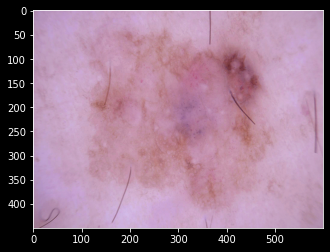

In [13]:
test_image_file_path = test_data_directory + '/bkl/ISIC_0024312.jpg'
test_prediction = classify(test_image_file_path)

print(test_prediction)